# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the features

## Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv')
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv')

## Explore Data

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
1,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
2,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
3,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
4,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
0,1
1,1
2,1
3,0
4,0


In [5]:
loan_data_targets_train.shape

(373028, 1)

In [6]:
loan_data_inputs_train.shape

(373028, 323)

In [7]:
loan_data_inputs_test.shape

(93257, 323)

In [8]:
loan_data_targets_test.shape

(93257, 1)

In [9]:
loan_data_inputs_train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-2',
       'mths_since_last_record:3-20', 'mths_since_last_record:21-31',
       'mths_since_last_record:32-80', 'mths_since_last_record:81-86',
       'mths_since_last_record:>=86'],
      dtype='object', length=323)

## Selecting the Features

In [10]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [11]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis= 1)

## Logistic regression

In [13]:
pd.options.display.max_rows = None

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
reg = LogisticRegression()

In [16]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
reg.intercept_

array([-1.33109498])

In [18]:
reg.coef_

array([[ 1.16008074,  0.90604826,  0.70885864,  0.51905996,  0.33683764,
         0.14489896,  0.09079946,  0.10678404,  0.02966995,  0.05525237,
         0.05661133,  0.05940726,  0.07497622,  0.13244904,  0.09936767,
         0.18112842,  0.22496981,  0.22035133,  0.25915909,  0.31662865,
         0.51750751,  0.08806845, -0.01075325,  0.30676887,  0.2025109 ,
         0.21415573,  0.26666852,  0.05443093,  0.0780792 ,  0.10017868,
         0.12530204,  0.0896006 ,  0.06084524,  0.12334608,  1.07505672,
         0.87435314,  0.77403287,  0.5729419 ,  0.41066217,  0.16587658,
        -0.06980937,  0.85057113,  0.53835103,  0.28958872,  0.10065167,
         0.05613544,  0.0378409 ,  0.07956877,  0.11956272,  0.1262606 ,
         0.07428245,  0.03130584,  0.63476725,  0.491373  ,  0.28200723,
        -0.01101102, -0.10865448, -0.13433413, -0.14974033, -0.15435355,
        -0.11932173, -0.20970817,  0.12264558,  0.1784319 , -0.02093658,
         0.0253264 ,  0.21758189,  0.03470503,  0.0

In [19]:
feature_name = inputs_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331095
1,grade:A,1.160081
2,grade:B,0.906048
3,grade:C,0.708859
4,grade:D,0.519060
5,grade:E,0.336838
6,grade:F,0.144899
7,home_ownership:OWN,0.090799
8,home_ownership:MORTGAGE,0.106784
9,addr_state:NM_VA,0.029670


## Build a Logistic Regression Model with P-Values

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self, *args, **kwargs) -> None:
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit (self, X, y):
        self.model.fit(X, y)
        denom = (2 * (1 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) *2 for x in z_scores]

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()

In [23]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.331095
1,grade:A,1.160081
2,grade:B,0.906048
3,grade:C,0.708859
4,grade:D,0.519060
5,grade:E,0.336838
6,grade:F,0.144899
7,home_ownership:OWN,0.090799
8,home_ownership:MORTGAGE,0.106784
9,addr_state:NM_VA,0.029670


In [25]:
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))

In [26]:
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.331095,NaN
1,grade:A,1.160081,1.709481e-37
2,grade:B,0.906048,1.041197e-49
3,grade:C,0.708859,6.554654e-36
4,grade:D,0.519060,4.998306e-22
5,grade:E,0.336838,2.510471e-12
6,grade:F,0.144899,3.858289e-03
7,home_ownership:OWN,0.090799,6.804624e-06
8,home_ownership:MORTGAGE,0.106784,4.240386e-17
9,addr_state:NM_VA,0.029670,3.545549e-01


In [27]:
# if p-value < 0.05, we conclude that the coefficient of a variable is statistically significant

# We should remove 'delinq_2yrs:0', 'delinq_2yrs:1-3', 'open_acc:1-3','open_acc:4-12',
# 'open_acc:13-17','open_acc:18-22','open_acc:23-25','open_acc:26-30','open_acc:>=31', 'pub_rec:3-4',
# 'pub_rec:>=5','total_acc:28-51','total_acc:>=52',

# We'll also remove 'total_rev_hi_lim' since only one dummy variable is significant (normally, we should keep it)

# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [28]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [29]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [30]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
feature_name = inputs_train.columns.values

In [32]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.374034
1,grade:A,1.123662
2,grade:B,0.878918
3,grade:C,0.684796
4,grade:D,0.496923
5,grade:E,0.321492
6,grade:F,0.134283
7,home_ownership:OWN,0.093515
8,home_ownership:MORTGAGE,0.106249
9,addr_state:NM_VA,0.036018


In [33]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.374034,NaN
1,grade:A,1.123662,3.227809e-35
2,grade:B,0.878918,4.278890e-47
3,grade:C,0.684796,6.712816e-34
4,grade:D,0.496923,1.347052e-20
5,grade:E,0.321492,1.025506e-11
6,grade:F,0.134283,6.242191e-03
7,home_ownership:OWN,0.093515,3.461775e-06
8,home_ownership:MORTGAGE,0.106249,4.421319e-17
9,addr_state:NM_VA,0.036018,2.608550e-01


In [34]:
import pickle

In [35]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

### Validation test

In [36]:
 # Variables
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [37]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [38]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07569438, 0.92430562],
       [0.15076123, 0.84923877],
       [0.11465086, 0.88534914],
       ...,
       [0.0267866 , 0.9732134 ],
       [0.0402086 , 0.9597914 ],
       [0.04763349, 0.95236651]])

The first column is the probability of default (PD) and the second is the probability of non default

In [40]:
y_hat_test_proba = y_hat_test_proba [:][:, 1]

In [41]:
y_hat_test_proba

array([0.92430562, 0.84923877, 0.88534914, ..., 0.9732134 , 0.9597914 ,
       0.95236651])

In [42]:
loan_data_targets_test_temp = loan_data_targets_test

In [43]:
loan_data_targets_test_temp.reset_index(drop= True, inplace=True)

In [44]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)

In [45]:
df_actual_predicted_probs.shape

(93257, 2)

In [46]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [47]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [48]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.924306
1,1,0.849239
2,1,0.885349
3,1,0.940636
4,1,0.968665


### Accuracy and Area under Curve

In [49]:
tr = 0.5  # Threshold

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [50]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,6,10184
1,6,83061


In [51]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000064,0.109204
1,0.000064,0.890668


In [52]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'], colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.890732063008675

We have more than 10% False positive. That means that Borrowers that are susceptible to default will get the credits they ask for. This situation is unacceptable.

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve


In [54]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262869, 0.99262869, 0.99069778, ..., 0.48790859, 0.39373701,
        0.37528354]))

In [55]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

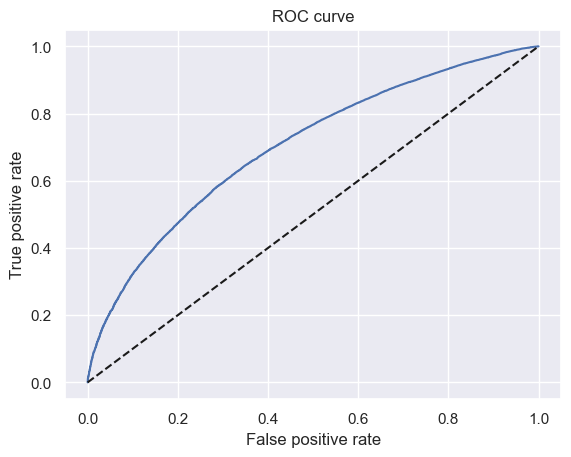

In [57]:
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [58]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022081073564498

### Gini and Kolmogorov-Smirnov

In [59]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [60]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
14868,1,0.375284,0
58288,1,0.392101,0
48752,0,0.393737,0
67123,0,0.448968,0
85282,0,0.457734,0


In [61]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
23536,1,0.991292,1
27134,1,0.991304,1
28298,1,0.991652,1
18097,1,0.992058,1
54837,1,0.992629,1


In [62]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [63]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,14868,1,0.375284,0
1,58288,1,0.392101,0
2,48752,0,0.393737,0
3,67123,0,0.448968,0
4,85282,0,0.457734,0


In [64]:
df_actual_predicted_probs['Cumulative_N_Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative_N_Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative_N_Bad'] = df_actual_predicted_probs['Cumulative_N_Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum() 

In [65]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad
0,14868,1,0.375284,0,1,1,0
1,58288,1,0.392101,0,2,2,0
2,48752,0,0.393737,0,3,2,1
3,67123,0,0.448968,0,4,2,2
4,85282,0,0.457734,0,5,2,3


In [66]:
df_actual_predicted_probs['Cumulative_Perc_Population'] = df_actual_predicted_probs['Cumulative_N_Population']/(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative_Perc_Good'] = df_actual_predicted_probs['Cumulative_N_Good']/df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative_Perc_Bad'] = df_actual_predicted_probs['Cumulative_N_Bad']/(df_actual_predicted_probs.shape[0]-df_actual_predicted_probs['loan_data_targets_test'].sum())

In [67]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_Perc_Population,Cumulative_Perc_Good,Cumulative_Perc_Bad
0,14868,1,0.375284,0,1,1,0,0.000011,0.000012,0.000000
1,58288,1,0.392101,0,2,2,0,0.000021,0.000024,0.000000
2,48752,0,0.393737,0,3,2,1,0.000032,0.000024,0.000098
3,67123,0,0.448968,0,4,2,2,0.000043,0.000024,0.000196
4,85282,0,0.457734,0,5,2,3,0.000054,0.000024,0.000294


In [68]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative_N_Population,Cumulative_N_Good,Cumulative_N_Bad,Cumulative_Perc_Population,Cumulative_Perc_Good,Cumulative_Perc_Bad
93252,23536,1,0.991292,1,93253,83063,10190,0.999957,0.999952,1.0
93253,27134,1,0.991304,1,93254,83064,10190,0.999968,0.999964,1.0
93254,28298,1,0.991652,1,93255,83065,10190,0.999979,0.999976,1.0
93255,18097,1,0.992058,1,93256,83066,10190,0.999989,0.999988,1.0
93256,54837,1,0.992629,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

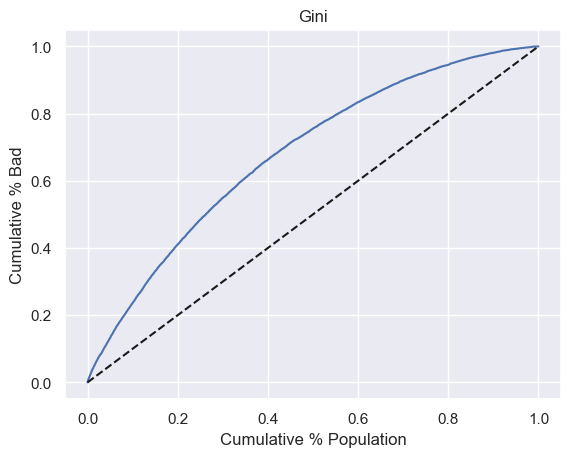

In [69]:
#### Gini Coefficient plot



plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Bad'])
plt.plot(df_actual_predicted_probs['Cumulative_Perc_Population'], df_actual_predicted_probs['Cumulative_Perc_Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [70]:
Gini = AUROC * 2 -1
Gini

0.40441621471289957

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

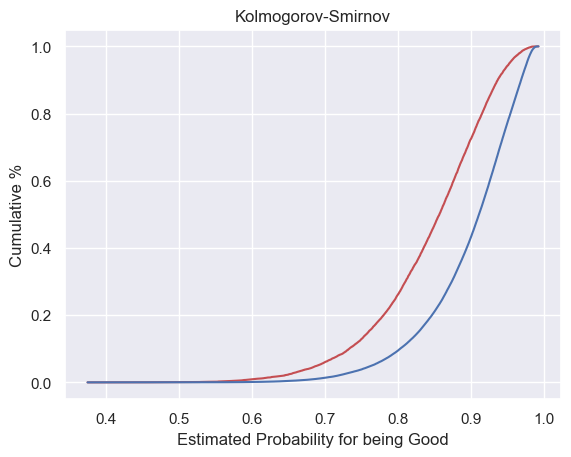

In [71]:
### KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative_Perc_Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative_Perc_Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [72]:
KS = max(df_actual_predicted_probs['Cumulative_Perc_Bad']- df_actual_predicted_probs['Cumulative_Perc_Good'])
KS

0.2966746932223847

#### Creating a Scorecard

In [73]:
# take into account the reference categories

ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [80]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories ['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [81]:
df_scorecard =  pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.374034,NaN
1,1,grade:A,1.123662,3.227809e-35
2,2,grade:B,0.878918,4.278890e-47
3,3,grade:C,0.684796,6.712816e-34
4,4,grade:D,0.496923,1.347052e-20
5,5,grade:E,0.321492,1.025506e-11
6,6,grade:F,0.134283,6.242191e-03
7,7,home_ownership:OWN,0.093515,3.461775e-06
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17
9,9,addr_state:NM_VA,0.036018,2.608550e-01


In [83]:
df_scorecard['original_feature_name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,original_feature_name
0,0,Intercept,-1.374034,NaN,Intercept
1,1,grade:A,1.123662,3.227809e-35,grade
2,2,grade:B,0.878918,4.278890e-47,grade
3,3,grade:C,0.684796,6.712816e-34,grade
4,4,grade:D,0.496923,1.347052e-20,grade
5,5,grade:E,0.321492,1.025506e-11,grade
6,6,grade:F,0.134283,6.242191e-03,grade
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state


In [84]:
min_score = 300
max_score = 850

In [86]:
df_scorecard.groupby('original_feature_name')['Coefficients'].min()

original_feature_name
Intercept                     -1.374034
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081518
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071788
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011185
Name: Coefficients, dtype: float64

In [88]:
min_sum_coef = df_scorecard.groupby('original_feature_name')['Coefficients'].min().sum()
min_sum_coef

-1.5385251490937597

In [89]:
max_sum_coef = df_scorecard.groupby('original_feature_name')['Coefficients'].max().sum()
max_sum_coef

5.590260694869595

In [91]:
df_scorecard['Score_calculation'] = df_scorecard['Coefficients'] * (max_score - min_score)/(max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,original_feature_name,Score_calculation
0,0,Intercept,-1.374034,NaN,Intercept,-106.009488
1,1,grade:A,1.123662,3.227809e-35,grade,86.692790
2,2,grade:B,0.878918,4.278890e-47,grade,67.810281
3,3,grade:C,0.684796,6.712816e-34,grade,52.833383
4,4,grade:D,0.496923,1.347052e-20,grade,38.338573
5,5,grade:E,0.321492,1.025506e-11,grade,24.803722
6,6,grade:F,0.134283,6.242191e-03,grade,10.360198
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership,7.214861
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership,8.197301
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state,2.778892


In [92]:
df_scorecard['Score_calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef))* (max_score - min_score) + min_score
df_scorecard

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99387/1302316222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score_calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef))* (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,original_feature_name,Score_calculation
0,0,Intercept,-1.374034,NaN,Intercept,312.690786
1,1,grade:A,1.123662,3.227809e-35,grade,86.692790
2,2,grade:B,0.878918,4.278890e-47,grade,67.810281
3,3,grade:C,0.684796,6.712816e-34,grade,52.833383
4,4,grade:D,0.496923,1.347052e-20,grade,38.338573
5,5,grade:E,0.321492,1.025506e-11,grade,24.803722
6,6,grade:F,0.134283,6.242191e-03,grade,10.360198
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership,7.214861
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership,8.197301
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state,2.778892


In [93]:
df_scorecard['Score_Preliminary'] = df_scorecard['Score_calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,original_feature_name,Score_calculation,Score_Preliminary
0,0,Intercept,-1.374034,NaN,Intercept,312.690786,313.0
1,1,grade:A,1.123662,3.227809e-35,grade,86.692790,87.0
2,2,grade:B,0.878918,4.278890e-47,grade,67.810281,68.0
3,3,grade:C,0.684796,6.712816e-34,grade,52.833383,53.0
4,4,grade:D,0.496923,1.347052e-20,grade,38.338573,38.0
5,5,grade:E,0.321492,1.025506e-11,grade,24.803722,25.0
6,6,grade:F,0.134283,6.242191e-03,grade,10.360198,10.0
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership,7.214861,7.0
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership,8.197301,8.0
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state,2.778892,3.0


In [95]:
# Check the minimum
min_sum_score_prel = df_scorecard.groupby('original_feature_name')['Score_Preliminary'].min().sum()
min_sum_score_prel

300.0

In [97]:
# Check the maximum
max_sum_score_prel = df_scorecard.groupby('original_feature_name')['Score_Preliminary'].max().sum()
max_sum_score_prel

851.0

This result is due to the round used earlier. We deal with that by substracting from the variable that was "rounded the most"

In [98]:
df_scorecard['Difference'] = df_scorecard['Score_Preliminary'] - df_scorecard['Score_calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,original_feature_name,Score_calculation,Score_Preliminary,Difference
0,0,Intercept,-1.374034,NaN,Intercept,312.690786,313.0,0.309214
1,1,grade:A,1.123662,3.227809e-35,grade,86.692790,87.0,0.307210
2,2,grade:B,0.878918,4.278890e-47,grade,67.810281,68.0,0.189719
3,3,grade:C,0.684796,6.712816e-34,grade,52.833383,53.0,0.166617
4,4,grade:D,0.496923,1.347052e-20,grade,38.338573,38.0,-0.338573
5,5,grade:E,0.321492,1.025506e-11,grade,24.803722,25.0,0.196278
6,6,grade:F,0.134283,6.242191e-03,grade,10.360198,10.0,-0.360198
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership,7.214861,7.0,-0.214861
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership,8.197301,8.0,-0.197301
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state,2.778892,3.0,0.221108


In [109]:
df_scorecard.groupby('original_feature_name')['Score_Preliminary'].max()

original_feature_name
Intercept                      313.0
acc_now_delinq                  14.0
addr_state                      40.0
annual_inc                      43.0
dti                             30.0
emp_length                      10.0
grade                           87.0
home_ownership                   8.0
initial_list_status              4.0
inq_last_6mths                  51.0
int_rate                        68.0
mths_since_earliest_cr_line     10.0
mths_since_issue_d              84.0
mths_since_last_delinq          14.0
mths_since_last_record          39.0
purpose                         23.0
term                             6.0
verification_status              7.0
Name: Score_Preliminary, dtype: float64

In [110]:
df_scorecard['Score_Final'] = df_scorecard['Score_Preliminary']
df_scorecard['Score_Final'][64] = 42
df_scorecard

/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/ipykernel_99387/3726461940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score_Final'][64] = 42


,index,Feature name,Coefficients,p_values,original_feature_name,Score_calculation,Score_Preliminary,Difference,Score_Final
0,0,Intercept,-1.374034,NaN,Intercept,312.690786,313.0,0.309214,313.0
1,1,grade:A,1.123662,3.227809e-35,grade,86.692790,87.0,0.307210,87.0
2,2,grade:B,0.878918,4.278890e-47,grade,67.810281,68.0,0.189719,68.0
3,3,grade:C,0.684796,6.712816e-34,grade,52.833383,53.0,0.166617,53.0
4,4,grade:D,0.496923,1.347052e-20,grade,38.338573,38.0,-0.338573,38.0
5,5,grade:E,0.321492,1.025506e-11,grade,24.803722,25.0,0.196278,25.0
6,6,grade:F,0.134283,6.242191e-03,grade,10.360198,10.0,-0.360198,10.0
7,7,home_ownership:OWN,0.093515,3.461775e-06,home_ownership,7.214861,7.0,-0.214861,7.0
8,8,home_ownership:MORTGAGE,0.106249,4.421319e-17,home_ownership,8.197301,8.0,-0.197301,8.0
9,9,addr_state:NM_VA,0.036018,2.608550e-01,addr_state,2.778892,3.0,0.221108,3.0


In [111]:
# Check the minimum
min_sum_score_prel = df_scorecard.groupby('original_feature_name')['Score_Final'].min().sum()
min_sum_score_prel

300.0

In [112]:
# Check the maximum
max_sum_score_prel = df_scorecard.groupby('original_feature_name')['Score_Final'].max().sum()
max_sum_score_prel

850.0

#### Calculating Credit Score

In [113]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


We calculate credit score by multiplying the values of the dummy variables, which are only zeroes and ones, by the respective scores.

In [114]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [115]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [116]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [117]:
# Keep the variables in the same order as in the score card
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [118]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [119]:
# make sure about dimension compatibility

scorecard_scores = df_scorecard['Score_Final']
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [123]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [124]:
scorecard_scores.shape

(102, 1)

In [125]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [126]:
y_scores.head()

,0
0,614.0
1,553.0
2,577.0
3,633.0
4,683.0


#### From Credit Score to PD

In [127]:
sum_coef_from_score = ((y_scores- min_score)/(max_score-min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [128]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
0,0.926311
1,0.850778
2,0.886128
3,0.941455
4,0.968498


In [129]:
y_hat_test_proba[0:5]

array([0.92430562, 0.84923877, 0.88534914, 0.94063587, 0.96866482])

### Setting Cut-offs

In [130]:
# thresholds from ROC Curve
thresholds

array([1.99262869, 0.99262869, 0.99069778, ..., 0.48790859, 0.39373701,
       0.37528354])

In [131]:
thresholds.shape

(17264,)

In [132]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433


In [133]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [134]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds']))- min_sum_coef)* ((max_score - min_score)/(max_sum_coef-min_sum_coef)) + min_score).round()
df_cutoffs.head()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3253.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [135]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [136]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17259,0.493408,0.999411,0.999964,417.0
17260,0.488602,0.999607,0.999964,415.0
17261,0.487909,0.999607,0.999976,415.0
17262,0.393737,1.000000,0.999976,385.0
17263,0.375284,1.000000,1.000000,379.0


In [141]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [142]:
df_cutoffs['N_Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N_Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N_Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval_Rate'] = df_cutoffs['N_Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection_Rate'] = 1 - df_cutoffs['Approval_Rate']
# Rejection rate equals one minus approval rate.

In [144]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N_Approved,N_Rejected,Approval_Rate,Rejection_Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989762,0.000098,0.000433,771.0,37,93220,0.000397,0.999603


In [145]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N_Approved,N_Rejected,Approval_Rate,Rejection_Rate
17259,0.493408,0.999411,0.999964,417.0,93248,9,0.999903,0.000097
17260,0.488602,0.999607,0.999964,415.0,93250,7,0.999925,0.000075
17261,0.487909,0.999607,0.999976,415.0,93251,6,0.999936,0.000064
17262,0.393737,1.000000,0.999976,385.0,93255,2,0.999979,0.000021
17263,0.375284,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


In [143]:
df_cutoffs.iloc[1000: 2000,]

,thresholds,fpr,tpr,Score,N_Approved,N_Rejected,Approval_Rate,Rejection_Rate
1000,0.953219,0.049362,0.206809,651.0,17682,75575,0.189605,0.810395
1001,0.953192,0.049362,0.207026,651.0,17700,75557,0.189798,0.810202
1002,0.953190,0.049460,0.207026,651.0,17701,75556,0.189809,0.810191
1003,0.953187,0.049460,0.207050,651.0,17703,75554,0.189830,0.810170
1004,0.953184,0.049558,0.207050,651.0,17704,75553,0.189841,0.810159
1005,0.953143,0.049558,0.207278,651.0,17723,75534,0.190045,0.809955
1006,0.953139,0.049657,0.207278,651.0,17724,75533,0.190055,0.809945
1007,0.953105,0.049657,0.207471,651.0,17740,75517,0.190227,0.809773
1008,0.953105,0.049755,0.207471,651.0,17741,75516,0.190238,0.809762
1009,0.953016,0.049755,0.208073,651.0,17791,75466,0.190774,0.809226


In [146]:
df_cutoffs.iloc[5000: 6200,]

,thresholds,fpr,tpr,Score,N_Approved,N_Rejected,Approval_Rate,Rejection_Rate
5000,0.903583,0.259470,0.547678,591.0,48138,45119,0.516186,0.483814
5001,0.903546,0.259470,0.547919,591.0,48158,45099,0.516401,0.483599
5002,0.903546,0.259568,0.547919,591.0,48159,45098,0.516412,0.483588
5003,0.903510,0.259568,0.548148,591.0,48178,45079,0.516615,0.483385
5004,0.903508,0.259666,0.548148,591.0,48179,45078,0.516626,0.483374
5005,0.903482,0.259666,0.548316,591.0,48193,45064,0.516776,0.483224
5006,0.903481,0.259764,0.548316,591.0,48194,45063,0.516787,0.483213
5007,0.903473,0.259764,0.548413,591.0,48202,45055,0.516873,0.483127
5008,0.903472,0.259863,0.548413,591.0,48203,45054,0.516883,0.483117
5009,0.903448,0.259863,0.548629,591.0,48221,45036,0.517076,0.482924


In [147]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [148]:
df_scorecard.to_csv('df_scorecard.csv')